In [2]:
###############################################
# Goal of this code is to plot supplementary figures
# Fig. S1. Coh^2 between (1) precip and colq, (2) precip and colT
# Fig. S2. Zonal mean precip
# Fig. S3. KW phase speed Cp1 Cp2 with each parameter (N, m, alpha) varying at one time
# Fig. S4. KW composite 2D variables (precip, qlF, DCIN, T2)
# (All data needed for this code is uploaded on Github)
#
# Mu-Ting Chien
# 2024.3.19
#########################################

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/glade/work/muting/function/')
import KW_diagnostics as KW

/glade/u/ssg/ch/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Paramers for calculating coh^2
g      = 9.8
s2d    = 86400
re     = 6371*1000 #earth radius (m)

# Parameters for KW composite
PI = '\u03C0'
pi = np.pi
bin_simple = np.arange(-pi,pi+1/4*pi,1/4*pi)
bin_simple2 = np.arange(-pi,pi+1/2*pi,1/2*pi)

dir_out        = '/glade/work/muting/KW/'
CASENAME_LIST2 = list(['SST_AQP3_Qobs_27_-4K',\
                       'SST_AQP3_Qobs_27',\
                       'SST_AQP3_Qobs_27_4K'])
output_dir_all = dir_out+'output_data/All_3hr_10yr/'
fig_dir        = dir_out+'figure/Post_general/paper2/Supplement/'
title          = list(['(a) -4K','(b) CTL','(c) +4K'])
os.makedirs(fig_dir,exist_ok=True) 

In [5]:
#############################
# Load data for Fig. S1
############################
data = np.load(output_dir_all+'coh2_spectrum.npz')
coh_pr_PW = data['coh_pr_PW']
sin_pr_PW = data['sin_pr_PW']
cos_pr_PW = data['cos_pr_PW']
#
coh_pr_colT = data['coh_pr_colT']
sin_pr_colT = data['sin_pr_colT']
cos_pr_colT = data['cos_pr_colT']
#
coh_PCQ1_PCQ2 = data['coh_PCQ1_PCQ2']
sin_PCQ1_PCQ2 = data['sin_PCQ1_PCQ2']
cos_PCQ1_PCQ2 = data['cos_PCQ1_PCQ2']    
#
x = data['x']
y = data['y']
zwnum = data['zwnum']
freq  = data['freq']

In [ ]:
######################################
# Load data for Fig. S2: load precip and calculate zonal mean precip
############################################
for icase in range(0,3):
    
    CASENAME = CASENAME_LIST2[icase]+'_3h_20y'
    output_dir = dir_out+'output_data/'+CASENAME+'/'
    
    data = np.load(output_dir+'precip_zm.npz')
    if icase == 0:
        lat = data['lat']
        nlat = np.size(lat)
        pr_zm = np.empty([nlat,3])
        
    pr_zm[:,icase] = data['pr_zm']

In [51]:
##########################
# Load data for Fig. S3 
#############################
# Load Cp, Cp1, Cp2
data = np.load(output_dir_all+'kw_amplitude_gr_Cp_all.npz')
Cp_ave_new = data['Cp']
Cp1 = data['Cp1']
Cp2 = data['Cp2']
print('Cp:',Cp_ave_new)
print('Cp1:',Cp1)
print('Cp2:',Cp2)

# Load varying 1 parameter each time
data = np.load(output_dir_all+'Cp_change1parameter_N_m_alpha.npz')
Cp1_N = data['Cp1_N']
Cp2_N = data['Cp2_N']
Cp1_m = data['Cp1_m']
Cp2_m = data['Cp2_m']
Cp1_a = data['Cp1_a']
Cp2_a = data['Cp2_a']

Cp: [12.93694276 16.14079195 22.14137775]
Cp1: [21.38740186 24.03341728 23.36928963]
Cp2: [12.95380659 13.54211787 15.03421311]


In [ ]:
#############################
# Load data for Fig. S4
############################
# (1) load pr KW
data = np.load(output_dir_all+'kw_composite_2D_pr_DCIN_SF_all.npz')
pr_kw = data['pr_kw']

# (2)　Load KW composite q for all pressure levels and select only lower free troposphere
plev_lf_min = np.array([750,750,750])
plev_lf_max2 = np.array([850,850,850])
data = np.load(output_dir_all+'kw_composite_3D_q_all.npz')
qv_kw_all = data['qv_kw_all']
plev = data['plev']
for icase in range(0,3):
    ilev_lf_min = np.argwhere(plev==plev_lf_min[icase]).squeeze()
    ilev_lf_max = np.argwhere(plev==plev_lf_max2[icase]).squeeze()
    if icase == 0:
        phase = data['phase']
        nphase = np.size(phase)
        qv_kw_lf = np.empty([nphase,3]) # lower free troposphere
    qv_kw_lf[:,icase] = np.mean(qv_kw_all[:,ilev_lf_min:ilev_lf_max+1,icase],1)
    
# (3) Load DCIN
data = np.load(output_dir_all+'kw_composite_2D_pr_DCIN_SF_all.npz')
DCIN_kw   = data['DCIN_kw']
plev_dcin_lf = np.array([825, 850, 850]) # This is the pressure level used to calculate DCIN_kw (mse_s_kw at these levels-mse_bl_kw)

# （4) Load T2_kw
data = np.load(output_dir_all+'kw_composite_3D_QTUF_all.npz')
phase = data['phase']
T2_kw = data['T2_kw']
ilev_lf = np.zeros([3]).astype('int')
T2_kw_lf = np.empty([np.size(phase),3])
plev_lf_max = np.array([800,800,800])
for icase in range(0,3):
    ilev_lf_min_T = np.argwhere(plev==plev_lf_min[icase]).squeeze()
    ilev_lf_max_T = np.argwhere(plev==plev_lf_max2[icase]).squeeze()
    T2_kw_lf[:,icase] = np.mean(T2_kw[:,int(ilev_lf_min_T):int(ilev_lf_max_T)+1,icase],1)

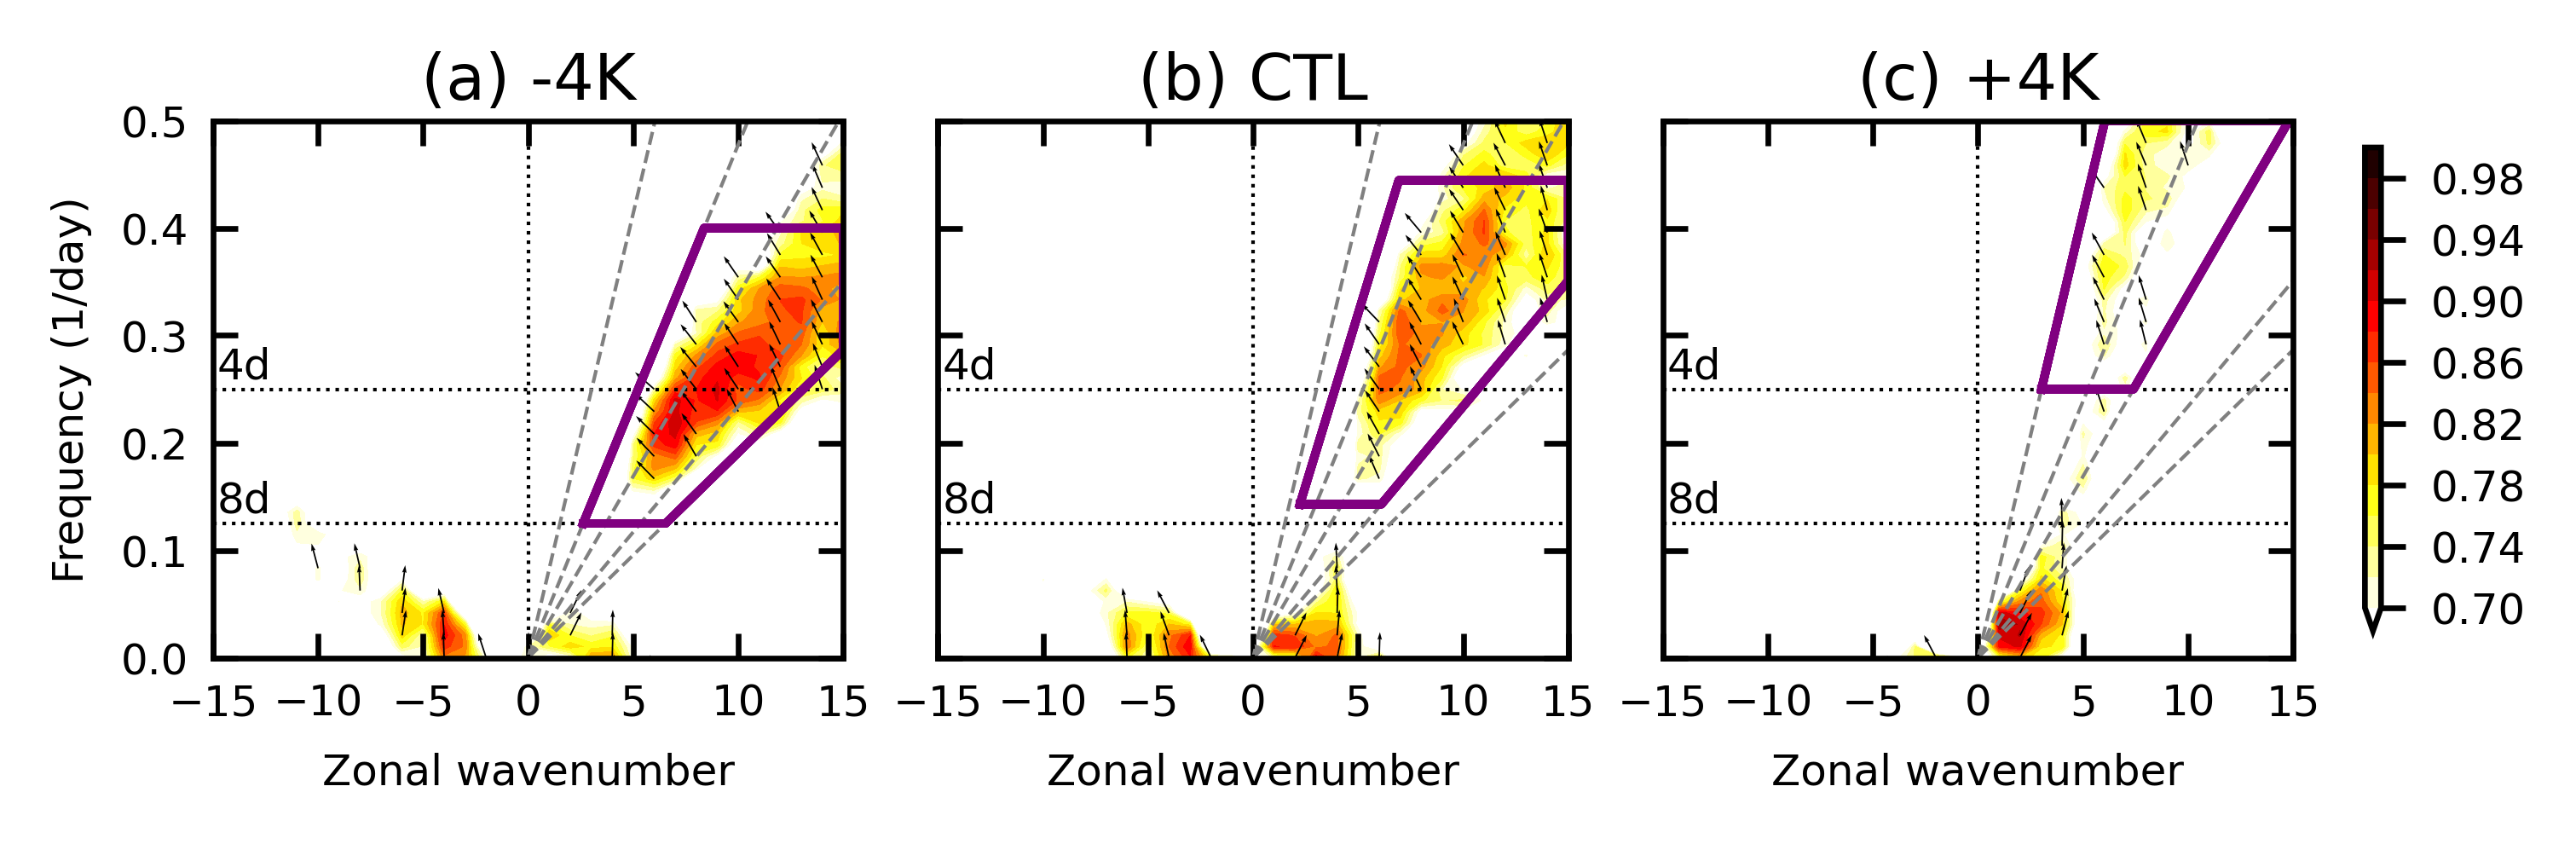

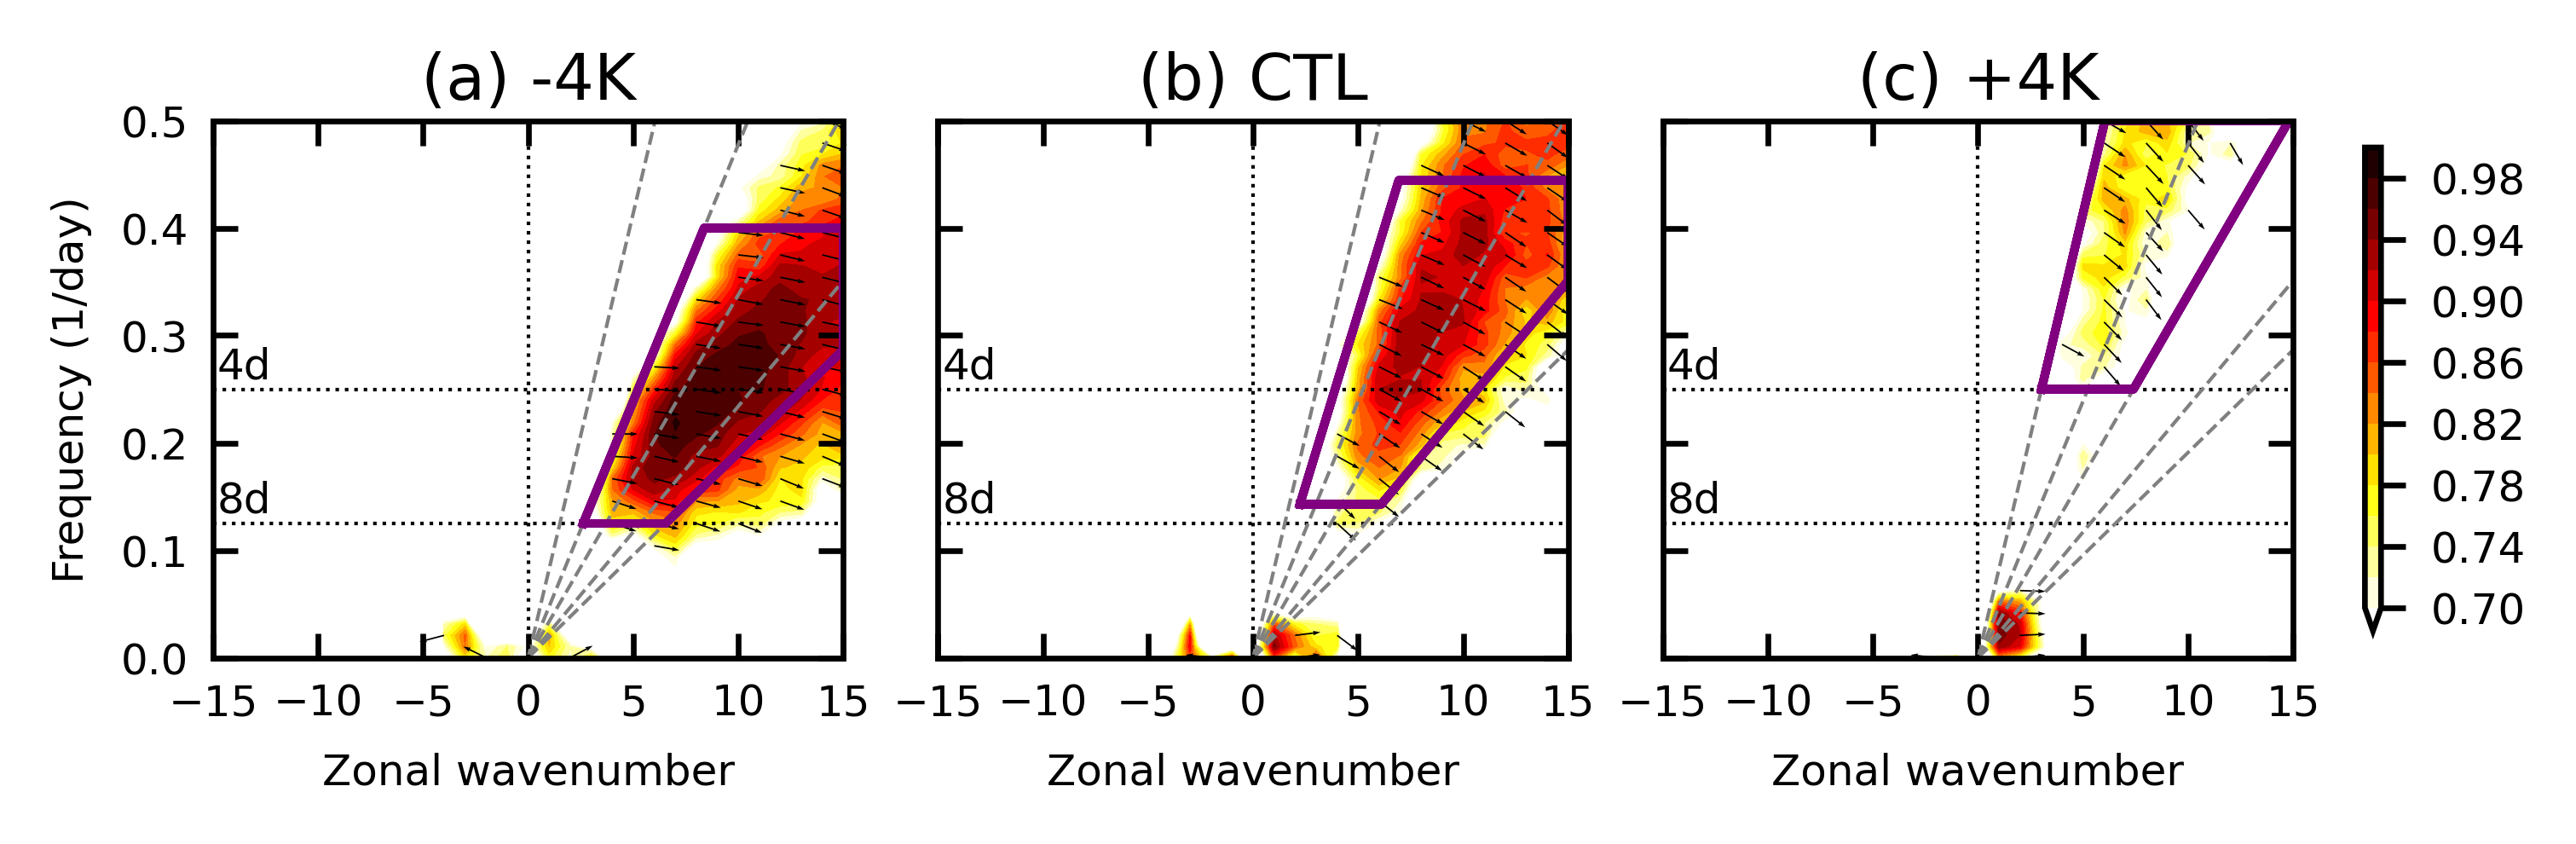

In [7]:
#########################################################
# Fig. S1: Coherence squared in wavenumber-frequency space (coh^2 between pr and colq, pr and colT)
##########################################################
vname = list(['pr_PW','pr_colT'])

axid = np.array([0,1,2]).astype('int')
xid = np.array([0,0,0]).astype('int')
yid = np.array([0,1,2]).astype('int')

coh_min = 0.7

for iplt in range(0,2):      
    
    figname = 'figs1_coh2_'+vname[iplt]+'.png'

    v_cf = globals() ['coh_'+vname[iplt]]
    v_sin = globals() ['sin_'+vname[iplt]]
    v_cos = globals() ['cos_'+vname[iplt]]

    v_sin_new = np.where(v_cf>=coh_min, v_sin, np.nan)
    v_cos_new = np.where(v_cf>=coh_min, v_cos, np.nan) 

    clev = np.arange(coh_min,1,0.02)
    ticks = np.arange(coh_min,1,0.04) 
    
    fig,ax = plt.subplots(1,3,figsize=(5.5, 1.5),dpi=600)
    plt.subplots_adjust(left=0.1,right=0.95,top=0.9,bottom=0.2,wspace=0.15)
    plt.rcParams.update({'font.size': 6})
    for v in range(0,3):

        #####################
        # Dispersion curve and CCKW band
        d = np.array([4,8])#([3,6]) # mark 3, 6, 20 day in WK1999
        dname = list(['4d','8d'])#(['3d','6d'])
        if v == 0:
            he = np.array([8,25,50]) 
            hname = list(['8m','25m','50m'])
        elif v==1:
            he = np.array([12,25,90]) # mark equivalent depth for sym spectrum
            hname = list(['12m','25m','90m'])
        elif v == 2:
            he = np.array([25,90,150]) 
            hname = list(['25m','90m','150m'])
        he_all = np.array([8, 12, 25, 50, 150])


        # dispersion curve
        xloc = np.array([12,12,4.9])
        yloc = np.array([0.29,0.47,0.47])
        cp = (g*he_all)**0.5
        zwnum_goal = 0.5/s2d/cp*2*np.pi*re
        # CCKW band
        s_min = (g*he[0])**0.5/(2*np.pi*re)*s2d #slope of he = 8m
        s_max = (g*he[2])**0.5/(2*np.pi*re)*s2d #slope of he = 90m
        kw_tmax_list = np.array([8,7,4])
        kw_tmax = kw_tmax_list[v]
        fmax = np.array([0.4,1/2.25,0.5])
        kw_x = np.array([1/kw_tmax/s_max, 1/kw_tmax/s_min,     15,  15, fmax[v]/s_max, 1/kw_tmax/s_max])
        kw_y = np.array([1/kw_tmax,             1/kw_tmax,  15*s_min, fmax[v],      fmax[v],  1/kw_tmax])


        ax[yid[v]] = plt.subplot(1,3,axid[v]+1)
        
        # plot coh2 and sin, cos
        cf = plt.contourf(x, y, v_cf[:,:,v], cmap='hot_r', levels = clev, extend='min') 
        
        # Mark 3, 6, 20 day period:
        for dd in range(0,np.size(d)):
            plt.plot([-15,15], [1/d[dd],1/d[dd]], 'k',linewidth=0.5, linestyle=':')#'dashed')
            plt.text(-14.8,1/d[dd]+0.01,dname[dd], fontsize=6)
        # Mark CCKW dispersion relationship:
        for hh in range(0,np.size(he_all)):
            plt.plot([0,zwnum_goal[hh]],[0,0.5],'grey',linewidth=0.5,linestyle='dashed')#,linestyle='dashed')#linestyle=':')#linestyle=(0,(5,5)))       
        # Mark zwnum == 0:
        plt.plot([0,0],[0,0.5],'k',linewidth=0.5,linestyle=':')#'dashed')
        # Mark CCKW band:
        # y=s*x
        for kk in range(0,np.size(kw_x)):
            plt.plot(kw_x,kw_y,'purple',linewidth=1.2,linestyle='solid')
        
        plt.title(title[v], pad=3, loc='center',fontsize=9)
        if v == 0:
            plt.ylabel('Frequency (1/day)')
        plt.xlabel('Zonal wavenumber')
        plt.axis([-15,15,0,0.5])
        plt.xticks([-15,-10,-5,0,5,10,15])
        plt.yticks(np.arange(0,0.6,0.1))
        plt.tick_params(bottom=True,top=True,left=True,right=True)
        if v == 0:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=True,labelright=False)
        else:
            plt.tick_params(labelbottom=True,labeltop=False,labelleft=False,labelright=False)
        plt.tick_params(direction="in")

        plt.quiver(zwnum[::2],freq[::2],v_sin_new[::2,::2,v],v_cos_new[::2,::2,v],units='inches',scale=20)
        
    cb = fig.colorbar(cf,ax=ax[:],orientation = 'vertical',shrink=.9,\
                    fraction=0.1, aspect=30, pad=0.03)
    cb.ax.tick_params(labelsize=6)
    cb.set_ticks(ticks)  
    plt.savefig(fig_dir+figname,format='png', dpi=600)
    plt.show()
    plt.close()                                

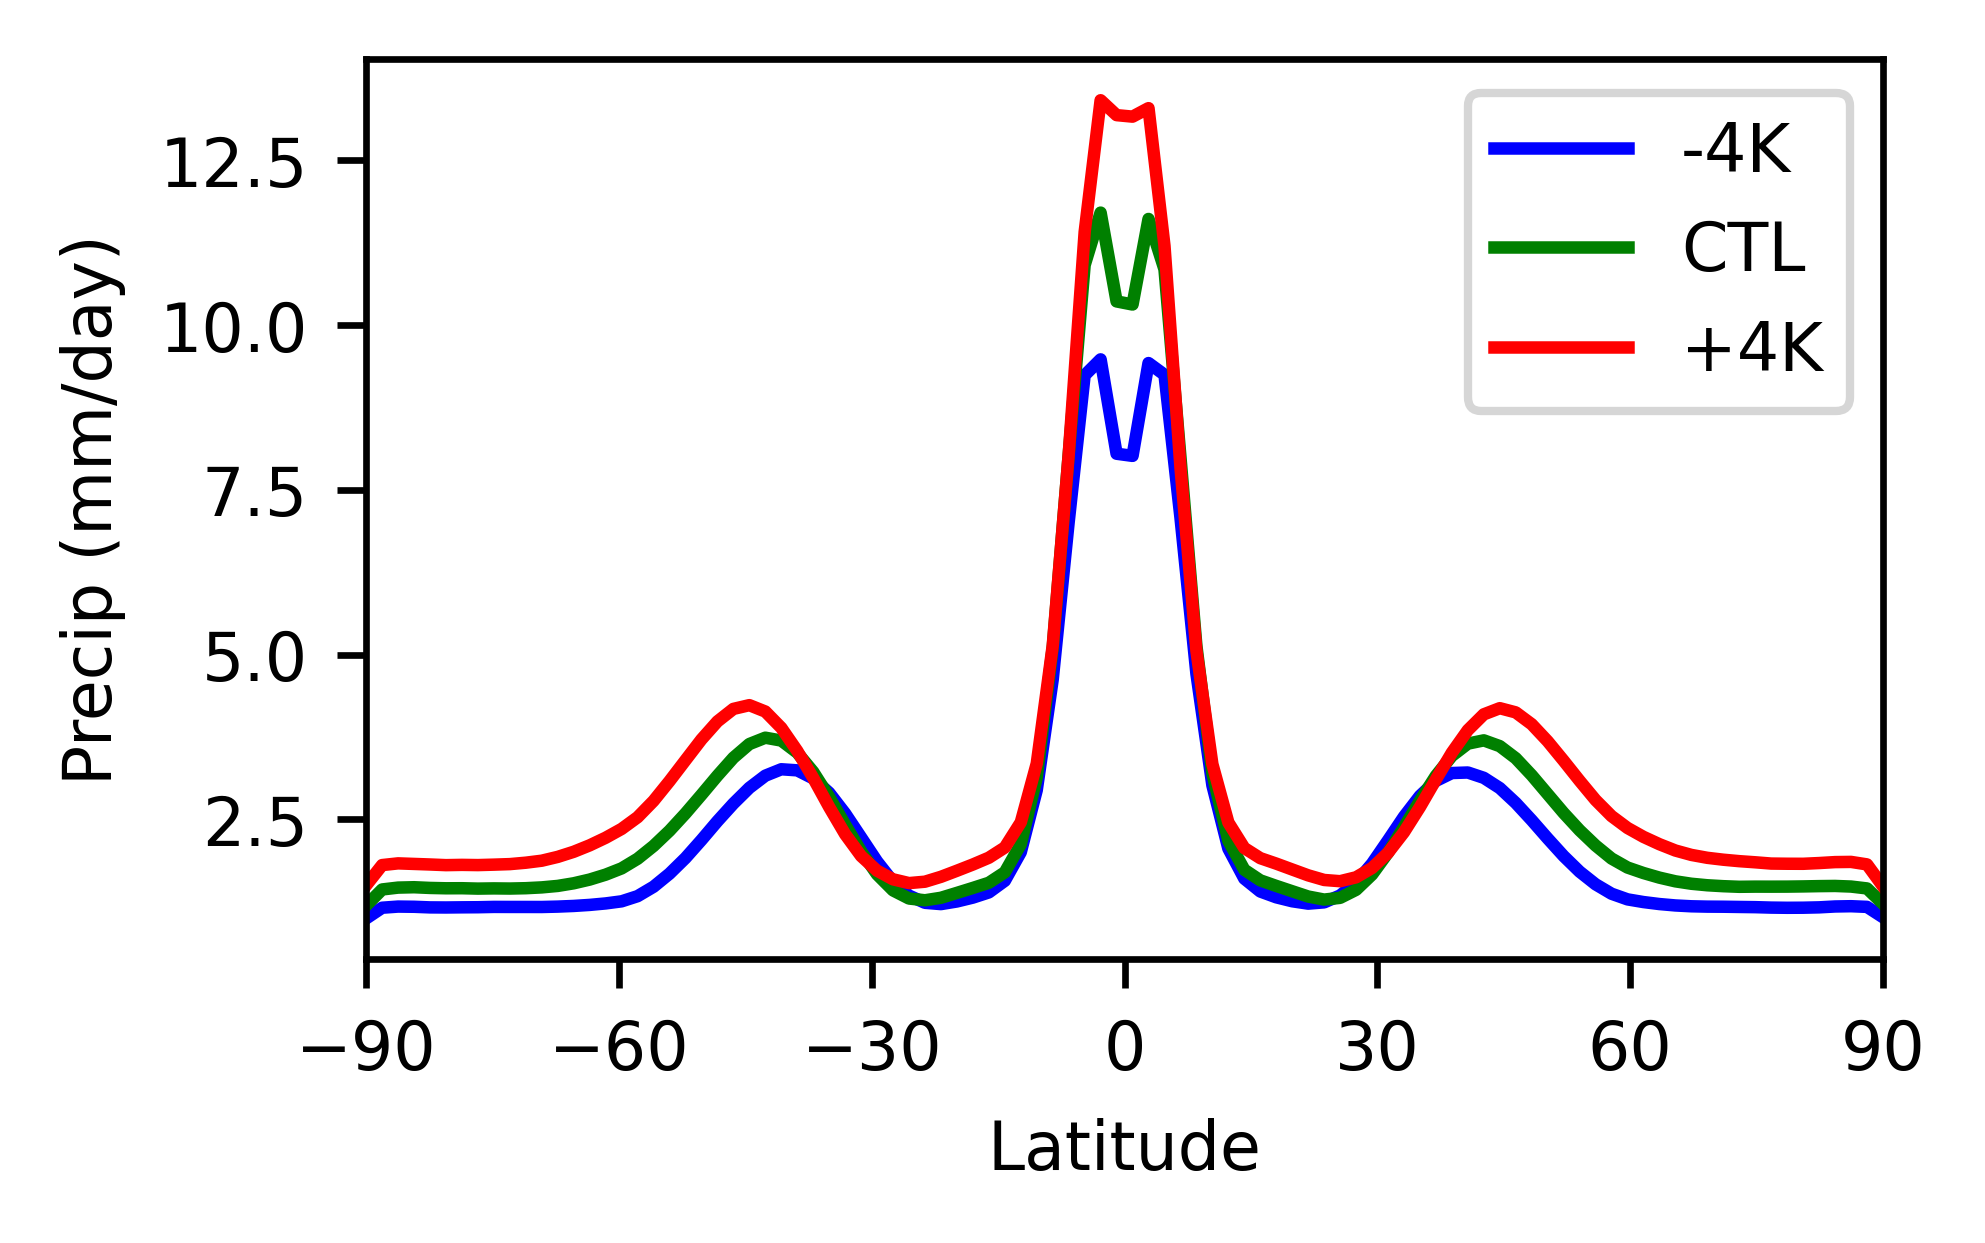

In [5]:
#####################################
# Fig. S2: precip zonal mean
#####################################
fig_name = 'figs2_pr_zm.png'
fig = plt.subplots(1,1,figsize=(3.2, 2),dpi=600)
plt.subplots_adjust(left=0.2,right=0.99,top=0.95,bottom=0.2)
plt.rcParams.update({'font.size': 8})
plt.plot(lat, pr_zm[:,0],'b')
plt.plot(lat, pr_zm[:,1],'g')
plt.plot(lat, pr_zm[:,2],'r')
plt.legend(['-4K','CTL','+4K'])
plt.xlim([-90,90])
plt.xticks(np.arange(-90,120,30))
plt.xlabel('Latitude')
plt.ylabel('Precip (mm/day)')
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()
plt.close()

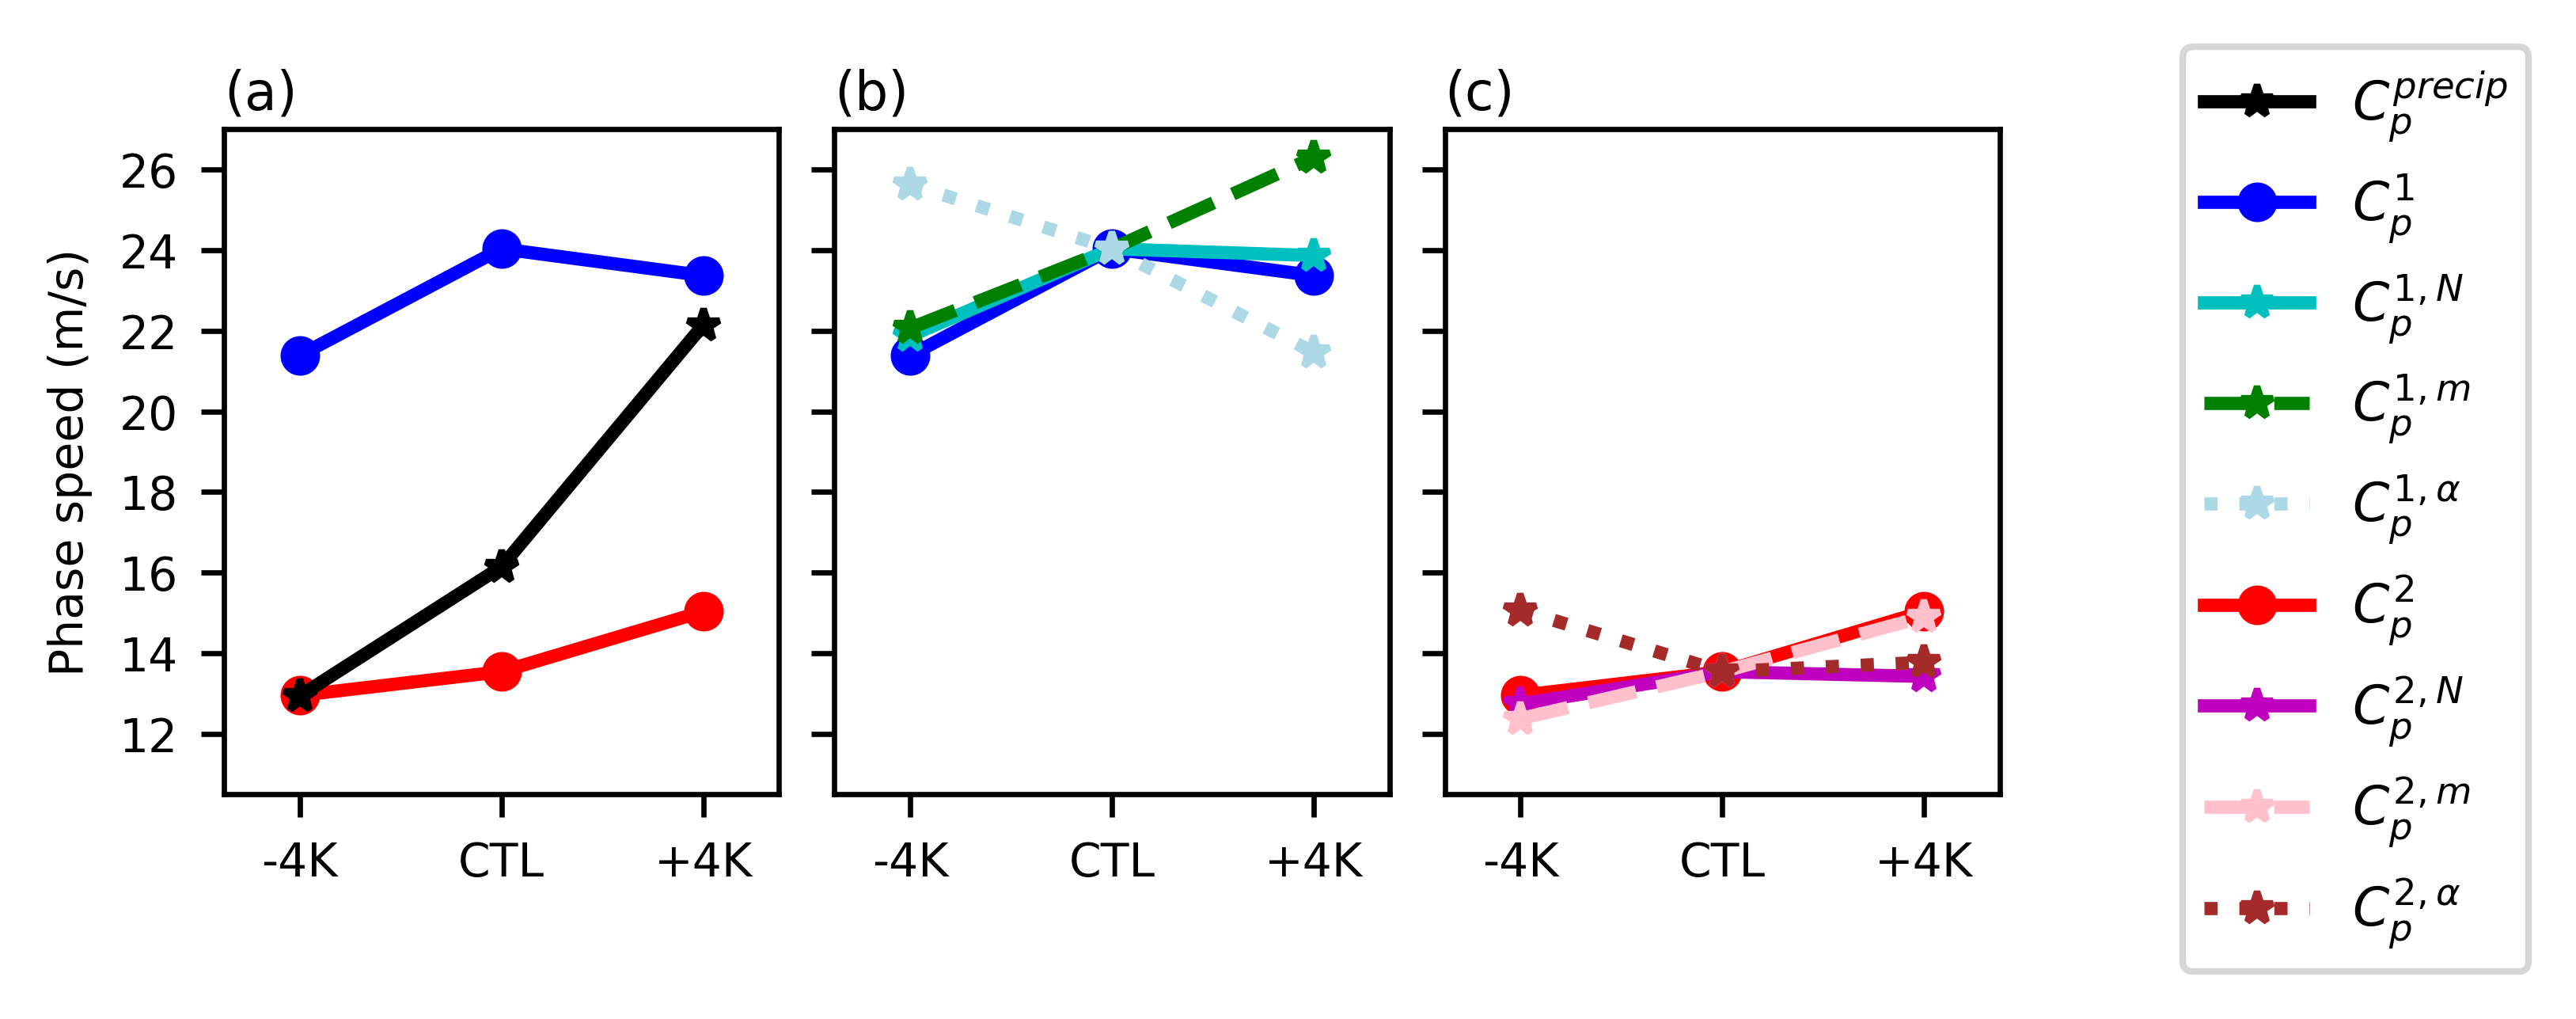

In [40]:
########################################################
# Fig. S3: Plot phase speed, "change" one parameter at one time, legend showing all line colors
##############################################################
fig, axes = plt.subplots(1, 3, figsize=(5.5, 2), dpi=600)
plt.subplots_adjust(left=0.1, right=0.78, top=0.9, bottom=0.2, wspace=0.1)
plt.rcParams.update({'font.size': 8})

sst = np.array([23, 27, 31])

# Plotting lines in each subplot and collecting lines and labels for the legend
lines = []
labels = []

# Subplot 1
plt.subplot(1, 3, 1)
plt.title('(a)', pad=3, loc='left', fontsize=8)
line1, = plt.plot(sst, Cp1, 'b-o', linewidth=2,markersize=5)
line2, = plt.plot(sst, Cp2, 'r-o', linewidth=2,markersize=5)
line3, = plt.plot(sst, Cp_ave_new, 'k-*', linewidth=2,markersize=5)
plt.xticks(sst, ('-4K', 'CTL', '+4K'))
plt.yticks(np.arange(12, 28, 2))
plt.axis([21.5, 32.5, 10.5, 27])
plt.ylabel('Phase speed (m/s)')
lines.extend([line3])
labels.extend(['$C^{\t{precip}}_{\t{p}}$'])
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)

# Subplot 2
plt.subplot(1, 3, 2)
plt.title('(b)', pad=3, loc='left', fontsize=8)
line1, = plt.plot(sst, Cp1, 'b-o', linewidth=2,markersize=5)
line2, = plt.plot(sst, Cp1_N, color='c', marker='*', linewidth=2, markersize=5)
line3, = plt.plot(sst, Cp1_m, color='g', marker='*', linewidth=2,linestyle='--',markersize=5)
line4, = plt.plot(sst, Cp1_a, color='lightblue', marker='*',linestyle=':', linewidth=2, markersize=5)
plt.xticks(sst, ('-4K', 'CTL', '+4K'))
plt.yticks(np.arange(12, 28, 2))
plt.axis([21.5, 32.5, 10.5, 27])
lines.extend([line1, line2, line3, line4])
labels.extend(['$C^{\t{1}}_{\t{p}}$', '$C^{\t{1, N}}_{\t{p}}$', '$C^{\t{1, m}}_{\t{p}}$', '$C^{\t{1, \u03B1}}_{\t{p}}$'])
plt.tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=False)

# Subplot 3
plt.subplot(1, 3, 3)
plt.title('(c)', pad=3, loc='left', fontsize=8)
line1, = plt.plot(sst, Cp2, 'r-o', linewidth=2,markersize=5)
line2, = plt.plot(sst, Cp2_N, 'm-*', linewidth=2, markersize=5)
line3, = plt.plot(sst, Cp2_m, color='pink', marker='*',linestyle='--', linewidth=2, markersize=5)
line4, = plt.plot(sst, Cp2_a, color='brown', marker='*',linestyle=':', linewidth=2, markersize=5)
plt.xticks(sst, ('-4K', 'CTL', '+4K'))
plt.yticks(np.arange(12, 28, 2))
plt.axis([21.5, 32.5, 10.5, 27])
lines.extend([line1, line2, line3, line4])
labels.extend(['$C^{\t{2}}_{\t{p}}$', '$C^{\t{2, N}}_{\t{p}}$', '$C^{\t{2, m}}_{\t{p}}$', '$C^{\t{2, \u03B1}}_{\t{p}}$'])

# Adding legend outside the subplots
plt.figlegend(lines, labels, bbox_to_anchor=(0.84, 0.5), loc='center left', fontsize=8)

plt.tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=False)

plt.savefig(fig_dir + 'figs3_Cp1_Cp2_N_m_a.png', dpi=600)
plt.show()

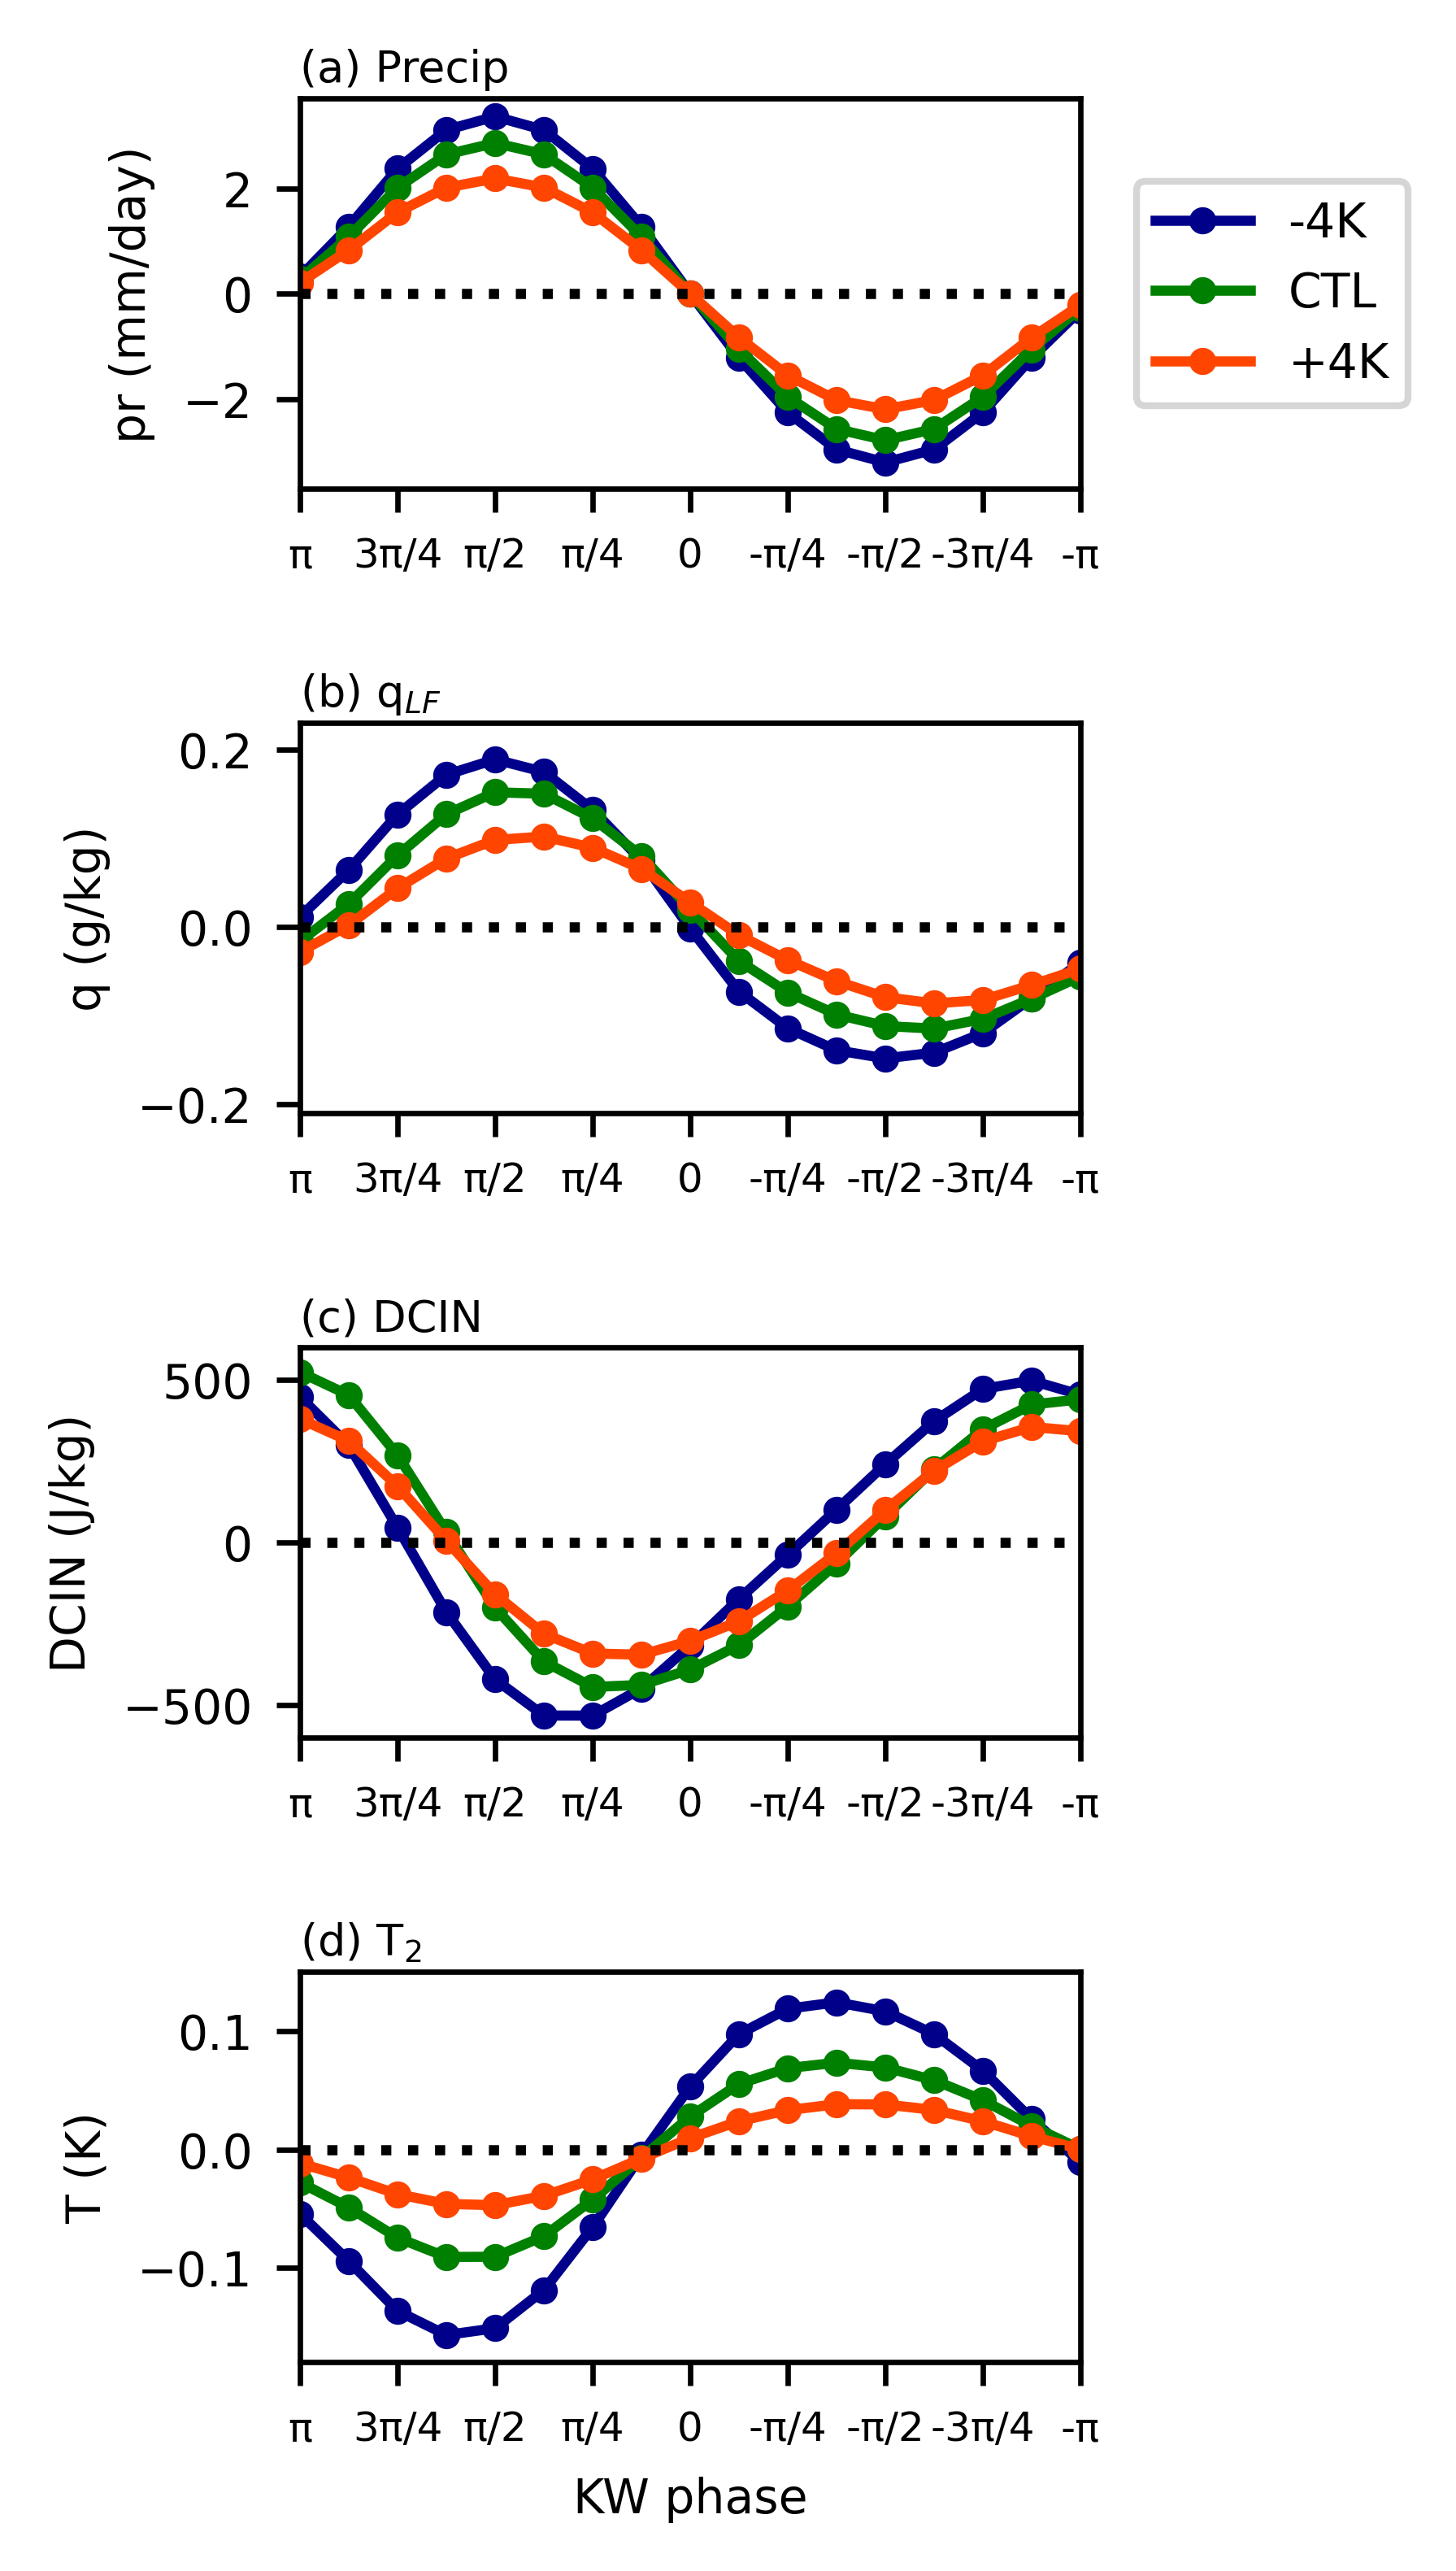

In [44]:
###################################
# Fig. S4 KW composite 2D variables (top to bottom: pr_kw, q_750_800_kw, DCIN_750_800_kw, T2_kw)
#################################
plt.rcParams.update({'font.size': 7})
fig_name = 'figs4_KW_composite_pr_q_DCIN_T2.png'
ymax = np.array([3.7, 0.23, 600, 0.15])
ymin = np.array([-3.7, -0.21, -600, -0.18])
#
fig, axes = plt.subplots(4,1,figsize=(3.2, 5.8),dpi=600)
plt.subplots_adjust(left=0.2,right=0.7,top=0.9,bottom=0.1,hspace=0.6)
zero = np.zeros([np.size(phase)])
title_list = list(['(a) Precip','(b) q$_{LF}$','(c) DCIN','(d) T$_{2}$'])
vlist = list(['pr_kw','qv_kw_lf','DCIN_kw','T2_kw_lf'])
ylabel_list = list(['pr (mm/day)','q (g/kg)','DCIN (J/kg)','T (K)'])
#
for iplt in range(0,4):
    plt.subplot(4,1,iplt+1)
    ax = plt.gca()
    plt.title(title_list[iplt], pad=2.5, loc='left',fontsize=6.5)
    VAR = globals()[vlist[iplt]]
    plt.plot(phase, VAR[:,0],color='darkblue',marker='o',markersize=3)
    plt.plot(phase, VAR[:,1],color='green',marker='o',markersize=3)
    plt.plot(phase, VAR[:,2],color='orangered',marker='o',markersize=3)
    if iplt == 0:
        ax.legend(['-4K','CTL','+4K'],bbox_to_anchor=(1.45, 0.5), loc='center right',fontsize=7)
    plt.plot(phase, zero, 'k:')
    plt.ylabel(ylabel_list[iplt])
    plt.xticks(bin_simple,(PI,'3'+PI+'/4',PI+'/2',PI+'/4','0','-'+PI+'/4','-'+PI+'/2','-3'+PI+'/4','-'+PI), fontsize=6)
    plt.xlim(-np.pi,np.pi)
    plt.ylim(ymin[iplt],ymax[iplt])
    if iplt == 3:
        plt.xlabel('KW phase')
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()